# Homework 6 Problem 2

## Spatiotemporal Data : Mapping and analysis of earthquakes

In [1]:
!pip install --upgrade matplotlib
!conda install -y basemap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sea
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

Requirement already up-to-date: matplotlib in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: python-dateutil>=2.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg (from matplotlib)
Requirement already up-to-date: pytz in /opt/conda/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: numpy>=1.7.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: kiwisolver>=1.0.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: setuptools in /opt/conda/lib/python3.6/site-packages (from kiwisolver>=1.0.1->matplotlib)
You 

In [2]:
quake_df = pd.read_csv('earthquakes.csv')

quake_df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
quake_df = quake_df[['Date', 'Latitude', 'Longitude', 'Magnitude', 'Depth', 'Type']]

quake_df.head()

,Date,Latitude,Longitude,Magnitude,Depth,Type
0,01/02/1965,19.246,145.616,6.0,131.6,Earthquake
1,01/04/1965,1.863,127.352,5.8,80.0,Earthquake
2,01/05/1965,-20.579,-173.972,6.2,20.0,Earthquake
3,01/08/1965,-59.076,-23.557,5.8,15.0,Earthquake
4,01/09/1965,11.938,126.427,5.8,15.0,Earthquake


In [4]:
quake_df["Date"] = pd.to_datetime(quake_df["Date"])

quake_df.describe()

,Latitude,Longitude,Magnitude,Depth
count,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,5.882531,70.767911
std,30.113183,125.511959,0.423066,122.651898
min,-77.080000,-179.997000,5.500000,-1.100000
25%,-18.653000,-76.349750,5.600000,14.522500
50%,-3.568500,103.982000,5.700000,33.000000
75%,26.190750,145.026250,6.000000,54.000000
max,86.005000,179.998000,9.100000,700.000000


In [5]:
# TODO: See what the distribution of values is
quake_df.pivot_table(index = 'Type', values = 'Magnitude', aggfunc=len)  

,Magnitude
Type,
Earthquake,23232.0
Explosion,4.0
Nuclear Explosion,175.0
Rock Burst,1.0


## Step 2.1 Earthquakes Only, truncate at 2 decimal places 

By converting to int * 100.  Then group and count.

In [6]:
# TODO:
# Truncate to 2 decimal places

# Group by location and count quakes
def integer(x):
    return int(x) 

quake_df["near_lat"] = (quake_df["Latitude"] * 100).apply(integer)
quake_df["near_lon"] = (quake_df["Longitude"] * 100).apply(integer)

In [11]:
group_lat = quake_df.groupby(["near_lat", "near_lon"])
grouped = group_lat.count()

grouped_lati = quake_df.groupby(["near_lat", "near_lon"])['Date'].count()

grouped['quakes'] = grouped_lati.values
grouped = grouped.reset_index()

grouped = grouped.sort_values(by = ['quakes'],ascending=False) 
grouped.head()




,near_lat,near_lon,Date,Latitude,Longitude,Magnitude,Depth,Type,quakes
22078,5150,-17480,4,4,4,4,4,4,4
18587,3441,-11837,3,3,3,3,3,3,3
19256,3709,-11347,2,2,2,2,2,2,2
16309,1695,-10029,2,2,2,2,2,2,2
13379,202,9794,2,2,2,2,2,2,2


# Step 2.2 Plot on Map

Color coding frequency within quantile: 1 -> yellow, 2 -> orange, 3 -> red, 4 -> white

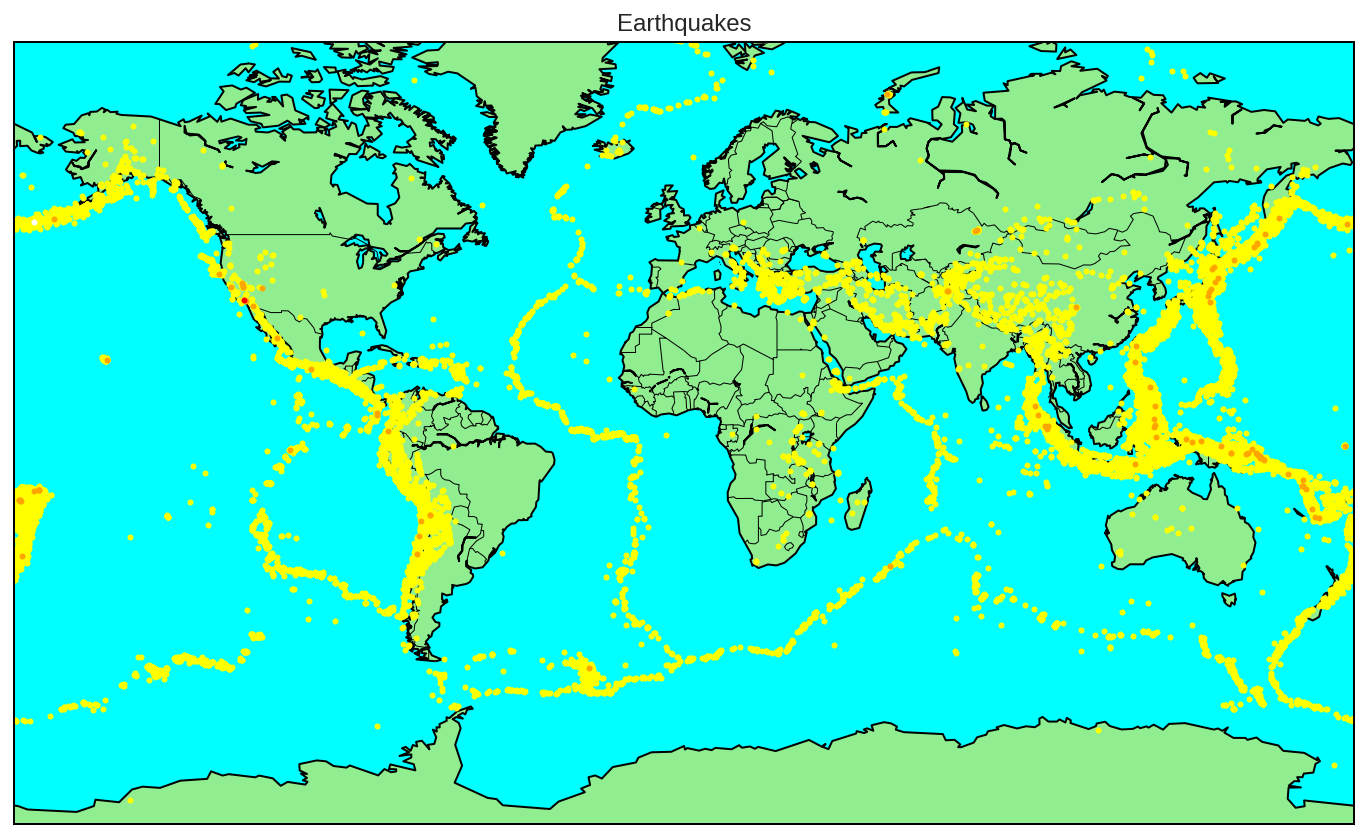

In [13]:
m = Basemap(projection='mill',llcrnrlat=-80,
            urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,
            lat_ts=20,resolution='c')

counts = (grouped['quakes']).tolist()
most = max(counts)


plt.figure(figsize=(12,10))
plt.title("Earthquakes")
m.fillcontinents(color='lightgreen',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
m.drawcountries()

# Color-code from 1 --> 4 earthquakes in same area w/in 2 decimal places
colors = ['none', 'yellow', 'orange', 'red', 'white']

# TODO:
# Instead of plotting everything with the same color -- compute subsets
# of data with 1, 2, .., 4 different quakes, and plot with colors from
# the colors list above

locations = []
for i in range(1, most+1):
    longitudes = (grouped.loc[grouped['quakes'] == i]['near_lon'] / 100).tolist()
    latitudes = (grouped.loc[grouped['quakes'] == i]['near_lat'] / 100).tolist()
    x,y = m(longitudes,latitudes)
    m.plot(x, y, "o", markersize = 3, color = colors[i])
    
plt.show()

# Step 2.3 Find Locations with Multiple Quakes in a Month

In [14]:
# TODO:
# compute DataFrame month_apart with pairs of earthquakes
# in the same (to 2 decimal places) location, which occur
# within a month of each other

from datetime import date
from dateutil.relativedelta import relativedelta

merged = quake_df.merge(quake_df, left_on=['near_lat', 'near_lon'], right_on = ['near_lat', 'near_lon'])
merged = merged.drop_duplicates()
merged = merged[merged['Type_x'] == 'Earthquake']
merged = merged.query('Date_x < Date_y') 

merged['z'] = merged['Date_x'].apply(lambda x: (x+relativedelta(months=1)))

month_apart = merged[merged['Date_y'] < merged['z']]
month_apart.head()

,Date_x,Latitude_x,Longitude_x,Magnitude_x,Depth_x,Type_x,near_lat,near_lon,Date_y,Latitude_y,Longitude_y,Magnitude_y,Depth_y,Type_y,z
7289,1984-09-18,34.006,141.500,6.8,47.6,Earthquake,3400,14150,1984-09-21,34.003,141.507,5.7,40.2,Earthquake,1984-10-18
7878,1985-11-17,-1.639,134.911,7.1,10.0,Earthquake,-163,13491,1985-12-06,-1.636,134.910,6.0,24.5,Earthquake,1985-12-17
12768,1995-07-30,-23.230,-70.676,5.8,33.0,Earthquake,-2323,-7067,1995-08-02,-23.230,-70.677,6.0,33.0,Earthquake,1995-08-30
15557,2001-04-01,-34.409,55.464,5.5,10.0,Earthquake,-3440,5546,2001-04-04,-34.405,55.464,5.5,10.0,Earthquake,2001-05-01
16792,2003-12-25,-22.305,169.531,6.0,10.0,Earthquake,-2230,16953,2004-01-03,-22.300,169.535,5.5,10.0,Earthquake,2004-01-25


# Step 2.3 Plot Multiple Quakes over Prior Map

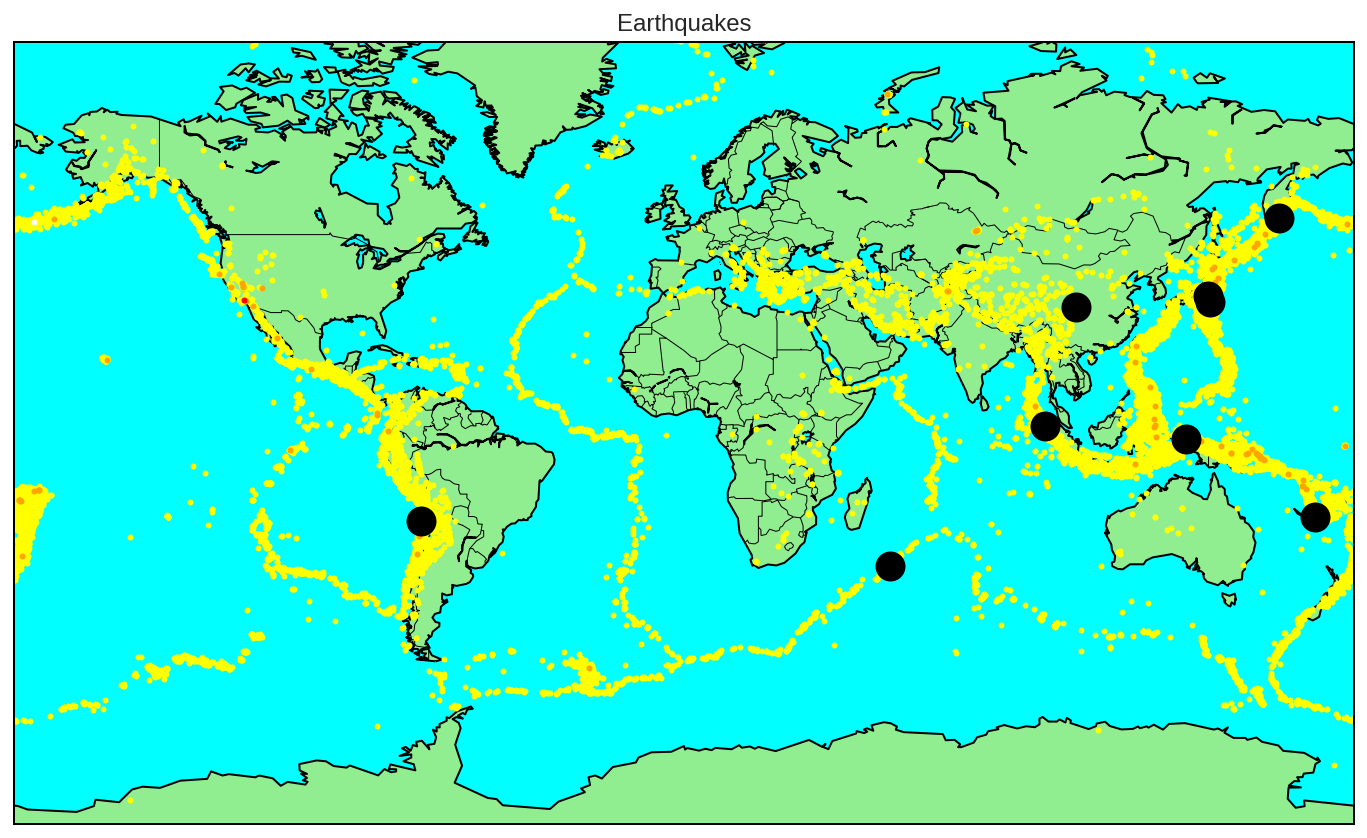

In [15]:
# TODO: reproduce plot from 2.2.
# Overlay points from month_apart
# Use "o", markersize = 15, color = 'black'

m = Basemap(projection='mill',llcrnrlat=-80,
            urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,
            lat_ts=20,resolution='c')

counts = (grouped['quakes']).tolist()
most = max(counts)


plt.figure(figsize=(12,10))
plt.title("Earthquakes")
m.fillcontinents(color='lightgreen',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
m.drawcountries()

# Color-code from 1 --> 4 earthquakes in same area w/in 2 decimal places
colors = ['none', 'yellow', 'orange', 'red', 'white']

locations = []
for i in range(1, most+1):
    longitudes = (grouped.loc[grouped['quakes'] == i]['near_lon'] / 100).tolist()
    latitudes = (grouped.loc[grouped['quakes'] == i]['near_lat'] / 100).tolist()
    x,y = m(longitudes,latitudes)
    m.plot(x, y, "o", markersize = 3, color = colors[i])

longitudes_d = (month_apart['near_lon'] / 100).tolist()
latitudes_d = (month_apart['near_lat'] / 100).tolist()
x_d,y_d = m(longitudes_d,latitudes_d)
m.plot(x_d, y_d, "o", markersize = 15, color = 'black')

plt.show()
